# <span style="color:GREEN">**DS 101 - Unsupervised Learning (Clustering)**</span>

## Objective: 
Apply **K-Means()** and **DBSCAN()** clustering algorithms to synthetic and real data. 

- **DBSCAN()** Original Paper - https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf 
- **K-Means()** Original Paper - https://digitalassets.lib.berkeley.edu/math/ucb/text/math_s5_v1_article-17.pdf

## Aims:
   > 1. To be able to apply **Kmeans()** and **DBSCAN()** algorithms to a dataset.
   >
   >
   >
   > 2. Understand the advantages and drawbacks of both clustering algorithms on different datasets.
   >
   >
   >
   > 3. Apply and understand 2 clustering metrics that can be used to optimise / tune the algorithm parameters
   >

In [ ]:
# Make sure that you are in the right DIR

!ls -l  # Mac
# %dir # windows

*Installing Modules...*

In [ ]:
# !pip install -r requirements.txt

In [ ]:
import glob
import math
import os
from datetime import datetime

import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from layouts import layout_2d, scene_3d
from matplotlib import pyplot as plt
from model import AutoDBSCAN, EpsTuner
from plotting import (
    generate_elbow_plots,
    plot_2d_clustered_scatter,
    plot_2d_scatter,
    plot_3d_clustered_scatter,
    plot_3d_scatter,
    plot_null_heat_map,
    build_plot_layout,
)
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from utils import (
    euclidean_dist_2d,
    euclidean_dist_3d,
    generate_2d_synthetic_blob_data,
    generate_3d_synthetic_blob_data,
    join_data,
    scaler,
)

pd.options.mode.chained_assignment = None

In [ ]:
# random seed to make NB reproducible
np.random.seed(42)

### <span style="color:BLUE">**1. 2-D Synthetic Data Generation**</span>

#### <span style="color:Orange"><u>*Bookmark*: Notebook Only</span>

> Generate synthetic 2 dimenational data 

In [ ]:
# (1) generate 2D raw data + plot
x, y = generate_2d_synthetic_blob_data([1, 4], [0.5, 0.5], 1000, add_noise=False)

# create 2d dataset
X = pd.DataFrame(data=list(zip(x, y)), columns=["x", "y"])

X.head()

In [ ]:
# plot raw data (no labels)
plot_2d_scatter(x, y, layout_2d)

In [ ]:
# plot raw data (with labels)
plot_2d_scatter(x, y, layout_2d, labels=[0] * 1000 + [1] * 1000)

### Comments:
>
> - If you are able to (2d or 3d), always plot the raw data and get a sense of what you perceive the clusters to be. For partitioning clustering this will allow you to input an educated guess for the number of clusters and for hierarchical clustering, it will enable you to move towards better model parameters more quickly. 
>
>
> - Inability to view data > 3d = **Curse of dimensionality**

### <span style="color:Blue">**2. Clustering in 2-D**</span>

#### <span style="color:orange"><u>*Bookmark*: Slides 6 (K-Means), 15, 16, 17 and 18 (DBSCAN)</span>

> Clustering the **2 dimensional data** using:
>
>    - **KMeans**(*n_clusters*)
>    - **DBSCAN**(*min_samples*, *eps*)

#### <span style="color:purple">1. K-Means(n_clusters) Clustering 2-D</span>

In [ ]:
# fit KMeans() to data with n_clusters=2
model = KMeans(n_clusters=2).fit(X)

# create a dataset with the raw features and the labels
df = join_data(X, model)
df.head()

In [ ]:
# plotting the clustered data
plot_2d_clustered_scatter(df=df, layout=layout_2d)

In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(X, model.labels_)}")

In [ ]:
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, model.labels_)}")

#### <span style="color:purple">2. DBSCAN(eps, min_samples) Clustering in 2-D</span>

In [ ]:
# fit DBSCAN() to data with default eps and min_samples as suggested >= n-dim + 2
model = DBSCAN(eps=1, min_samples=4).fit(X)

# create a dataset with the raw features and the label
df = join_data(X, model)
df.head()

In [ ]:
# plotting the clustered data
plot_2d_clustered_scatter(df=df, layout=layout_2d)

In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(X, model.labels_)}")

In [ ]:
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, model.labels_)}")

### Comments:
>
> - Both **K-Means()** and **DBSCAN()** were able to successfully cluster the synthetic 2-d gausssian blobs. 
> - The synthetic data that we have been clustered is just gaussian blobs with **no noise**. In real life, it very unlikely that your data will be devoid of noise / outliers.
> - In the next section we will **introduce noise in 3D** and assess how well the clustering techniques perform.

### <span style="color:BLUE">**3. 3-D Synthetic Data Generation with Noise**</span>

#### <span style="color:Orange"><u>*Bookmark*: Notebook Only</span>

In [ ]:
# generate 3D raw data + plot
x, y, z = generate_3d_synthetic_blob_data(
    [0, 3, -3], [0.75, 0.4, 0.5], 1000, add_noise=True
)

# create 3d dataset
X = pd.DataFrame(data=list(zip(x, y, z)), columns=["x", "y", "z"])
X.head()

In [ ]:
fig = plot_3d_scatter(x, y, z, layout=scene_3d)
fig.show()

### <span style="color:BLUE">**4. Clustering in 3-D**</span>

#### <span style="color:orange"><u>*Bookmark*: Slides 6 (K-Means), 15, 16, 17 and 18 (DBSCAN)</span>

> Clustering the **3 dimensional data with added noise** using:
>
>    - **K-Means**(*n_clusters*)
>    - **DBSCAN**(*min_samples*, *eps*)
>
>
>
>
*Q. Should the noise be clustered?*

#### <span style="color:purple">1. K-Means(n_clusters) Clustering 3-D (with noise)</span>

In [ ]:
# fit KMeans() to data with n_clusters=3
model = KMeans(n_clusters=3).fit(X)

# create a dataset with the raw features and the labels
df = join_data(X, model)
df.head()

In [ ]:
# plotting the clustered data
plot_3d_clustered_scatter(df=df, layout=scene_3d)

In [ ]:
print(f"Number of Clusters = {len(set(model.labels_))}")

In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(X, model.labels_)}")

In [ ]:
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, model.labels_)}")

#### <span style="color:purple">1. DBSCAN(eps, min_samples) Clustering 3-D (with noise)</span>

In [ ]:
# fit DBSCAN() to data with default eps and min_samples as suggested >= n-dim + 2
model = DBSCAN(eps=1, min_samples=4).fit(X)

# create a dataset with the raw features and the labels
df = join_data(X, model)
df.head()

In [ ]:
# plotting the clustered data
plot_3d_clustered_scatter(df=df, layout=scene_3d)

In [ ]:
print(f"Number of Clusters = {len(set(model.labels_)) - 1}")

In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(X, model.labels_)}")

In [ ]:
print(f"Calinski Harabasz Score: {calinski_harabasz_score(X, model.labels_)}")

### Comments:

> - **DBSCAN()** is able to decifer between manually added noise and the actual clusters. **K-Means()** is not. This is because **K-Means()** is an partitioning algorithm that introduces a decision boundary to ditinguish between the clusters. It is **exhaustive**. DBSCAN does not introduce a decision boundary as it is based on **density connectivity**, allowing it to not cluster sparce points.
>
>
> - Noise, if actually outliers **should NOT** be clustered. 
> 
>
> - Even though **DBSCAN()** is able to filter out the noise, the **Silhouette coefficient** and **Calinski Harabasz Score** of **K-Means()** are higher.
>
>
> - A drawback of both of **Silhouette Coefficient** and **Calinski Harabasz Score** is that they are generally higher for convex clusters than other concepts of clusters (arbitrary shape), such as density based clusters like those obtained through **DBSCAN()**. However, it should be noted that the non-clustered data points are being included in the metric calculations.
>
>


**Q. If we remove the noise from the calculation of the Silhouette Coefficient and Calinski Harabasz Score, does DBSCAN perform better?**

*Removing the non-clustered data points before computing the metric...*

In [ ]:
# plotting the clustered data with noise filtered out
plot_3d_clustered_scatter(df=df[df.cluster != -1], layout=scene_3d)

In [ ]:
# removing the noise labelled data points from the data and the labels
data_noise_removed = X[model.labels_ != -1]
labels_noise_removed = model.labels_[model.labels_ != -1]

In [ ]:
print(
    f"Silhouette Coefficient: {silhouette_score(data_noise_removed, labels_noise_removed)}"
)

In [ ]:
print(
    f"Calinski Harabasz Score: {calinski_harabasz_score(data_noise_removed, labels_noise_removed)}"
)

### Comments:

> - Removing the noise has improved the **Silhouette Coefficient** and **Calinski Harabasz** Score for **DBSCAN**().
>
>
> - According to the metrics, **DBSCAN**() is now performing better than **K-Means**().


| Model Type            | Silhouette          |Calinski Harabasz   |
| --------------------- | ------------------- |--------------------|
| **DBSCAN**() No Noise | **0.7479211979383711**  | **26848.48132827459**  |
|                       |                     |                    |
| **KMeans**() w/ Noise | 0.719957008289208   | 17490.405259058403 |
|                       |                     |                    |
| **DBSCAN**() w/ Noise | 0.7193542431042856  | 10750.352217092679 |
|                       |                     |                    |

### <span style="color:Black">**Q: How To Choose the Best Model Hyperparameters / What is the optimal number of clusters?**</span>

### <span style="color:Blue">**5. Threshold Tuning Using Performance Metrics (Synthetic Data)**</span>

#### <span style="color:Orange"><u>*Bookmark*: Slides **23**, **24** and **25**</span>

*Reminder on the performance metrics...*

> - **Silhouette Coefficient** = The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. *A greater cluster separation = higher score*.
> 
>
> - **Calinski Harabasz** = The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion. The score is higher when clusters are dense and well separated.


**Note:** Silhouette Coefficient and Calinski Harabasz do not need ground truth labels to be computed.

#### <span style="color:purple">1. K-Means(n_clusters)</span>

> - **K-Means()** only has one tunable parameter, *n_clusters*.
>
>
> - In order to find the optimal number of clusters we will vary *n_clusters* and assess the performance metrics.

In [ ]:
# set of n_clusters that we want to assess
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
S_scores = []
CH_scores = []

for i in n_clusters:
    model = KMeans(n_clusters=i).fit(X)
    S_scores.append(silhouette_score(X, model.labels_))
    CH_scores.append(calinski_harabasz_score(X, model.labels_))


df_metrics = pd.DataFrame(
    data=list(zip(n_clusters, S_scores, CH_scores)),
    columns=["n_clusters", "silhouette", "calinski_harabasz"],
)

df_metrics

In [ ]:
silhouette_fig, ch_fig = generate_elbow_plots(
    df_metrics,
    layout=build_plot_layout(
        title="",
        x_axis_title="n_clusters",
        y_axis_title="",
        h=500,
        w=500,
    ),
    model_type="kmeans",
)

In [ ]:
silhouette_fig.add_vline(x=3, line_width=1.5, line_dash="dash", line_color="red")
silhouette_fig.update_layout(title="Silhouette score as a function of varying clusters.", 
                             yaxis_title='Silhouette Score')

In [ ]:
ch_fig.add_vline(x=3, line_width=1.5, line_dash="dash", line_color="red")
ch_fig.update_layout(title="CH Score as a function of varying clusters.", 
                     yaxis_title='CH Score')

#### <span style="color:purple">2. DBSCAN(eps, min_samples)</span>

> - **DBSCAN()** has two tunable parameters, **eps** and **min_samples**.
>
>
> - **eps** is the most important hyperparameter (arguably) but we will demonstrate a good way of tuning it automatically.
>
>
> - We are going to fix min_samples to be > n-dimensions + 1 and then assess on a varying set of eps values 

In [ ]:
# assessing varying n_clusters on the metrics
MinPts = 5  # >= dim + 2

S_scores = []
CH_scores = []
S_scores_no_noise = []
CH_scores_no_noise = []
noise = []
num_clusters = []
Eps = [
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.35,
    0.4,
    0.45,
    0.5,
    0.55,
    0.6,
    0.65,
    0.7,
    0.75,
    0.8,
    0.9,
    1.0,
    1.1,
    1.2,
    1.25,
    1.3,
    1.4,
    1.5,
]

for eps in Eps:
    print(eps)
    model = DBSCAN(min_samples=MinPts, eps=eps).fit(X)

    S_scores.append(silhouette_score(X, model.labels_))
    CH_scores.append(calinski_harabasz_score(X, model.labels_))

    # applying metrics to the data with no noise
    S_scores_no_noise.append(
        silhouette_score(X[model.labels_ != -1], model.labels_[model.labels_ != -1])
    )
    CH_scores_no_noise.append(
        calinski_harabasz_score(
            X[model.labels_ != -1], model.labels_[model.labels_ != -1]
        )
    )

    noise.append(len(X[model.labels_ == -1]))
    num_clusters.append(len(set(model.labels_)) - (1 if -1 in model.labels_ else 0))


df_metrics = pd.DataFrame(
    data=list(
        zip(
            Eps,
            S_scores,
            CH_scores,
            S_scores_no_noise,
            CH_scores_no_noise,
            num_clusters,
            noise,
        )
    ),
    columns=[
        "eps",
        "silhouette_noise",
        "calinski_harabasz_noise",
        "silhouette",
        "calinski_harabasz",
        "number_of_clusters",
        "noise",
    ],
)
df_metrics

In [ ]:
# generate the figures of the metrics
silhouette_fig, ch_fig = generate_elbow_plots(
    df_metrics,
    layout=build_plot_layout(
        title=f"",
        x_axis_title="eps",
        y_axis_title="",
        h=700,
        w=700,
    ),
    model_type="dbscan",
)

In [ ]:
silhouette_fig.add_vline(x=0.45, line_width=1.5, line_dash="dash", line_color="red")
silhouette_fig.update_layout(title="Silhouette score as a function of varying clusters.", 
                             yaxis_title='Silhouette Score')

In [ ]:
ch_fig.add_vline(x=0.45, line_width=1.5, line_dash="dash", line_color="red")
ch_fig.update_layout(title="CH Score as a function of varying clusters.", 
                     yaxis_title='CH Score')

### <span style="color:Blue">**6. Threshold Tuning Using Distances (Sythnetic Data)**</span>

#### <span style="color:purple">1. KMeans(n_clusters)</span>

#### <span style="color:Orange"><u>*Bookmark*: Notebook Only</span>

> - You can choose the optimal number of *n_clusters* using the cluster inerta and assessing this across a number of different n_clusters. 
>
>
> - **Inertia** = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if  provided.
>
>
> - The basic assumption is that "best" clustered datasets will have the lowest inertia as the cluster samples will all be nearest to their clustere centroid. 

In [ ]:
# Threshold tuning using inertia
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
inertias = []
for i in n_clusters:
    model = KMeans(n_clusters=i).fit(X)
    inertias.append(model.inertia_)

# plot the inertia as a function of varying n_clusters
fig = go.Figure(
    data=go.Scatter(x=n_clusters, y=inertias),
    layout=build_plot_layout(
        title="Cluster Inertia Score (intra-cluster distance) for varying n_clusters.",
        x_axis_title="n_clusters",
        y_axis_title="Cluster Inertia Score",
        h=600,
        w=600,
    ),
)


fig.add_vline(x=3, line_width=1.5, line_dash="dash", line_color="red")
fig.show()

> - Personally I **don't like** intertia method
> - See: https://medium.com/towards-data-science/are-you-still-using-the-elbow-method-5d271b3063bd

#### <span style="color:purple">2. AutoDBSCAN(eps, min_samples)</span>

#### <span style="color:Orange"><u>*Bookmark*: Slides **Appendix (2)**</span>

> - Similar to **K-Means()** above, you can optimally select the eps value for **DBSCAN()** using **NearestNeighbours**. By taking the **Kth (min_samples + 1)** distance for each data point and **plotting the sorted distances**, you should get an **elbow**. 
>
>
> - Data points in dense areas (likely to be clustered) will have very similar values of Kth dist in comparison to data points in sparce regions where their values will exponentiate. The elbow is the point at which you maximise the eps-neighbourhood whilst minimising the number of outliers you have in the final clustering.

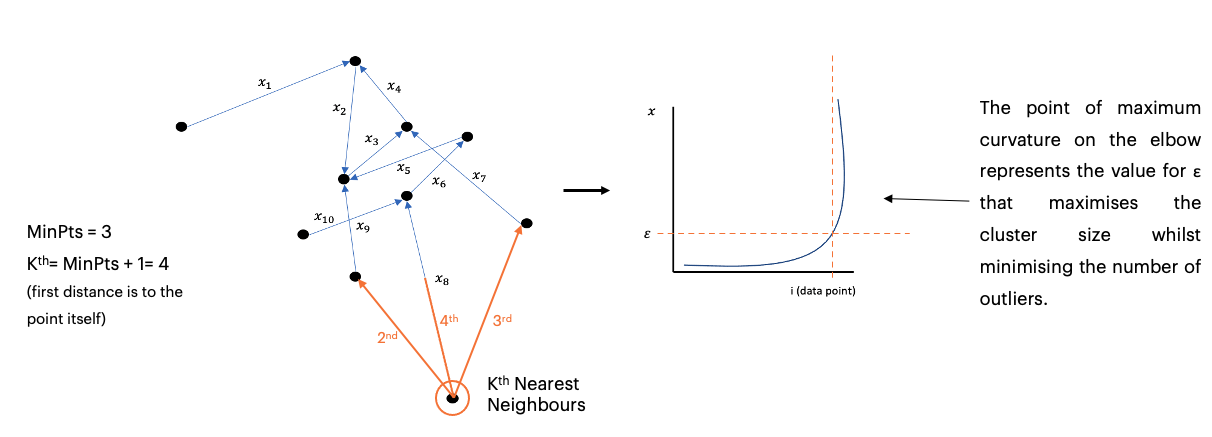

In [ ]:
model = AutoDBSCAN(min_samples=5).fit(X)

In [ ]:
model.eps

In [ ]:
fig2 = go.Figure(
    data=go.Scatter(x=np.arange(len(model.knn_distances)), y=model.knn_distances),
    layout=go.Layout(
        xaxis_title="x",
        yaxis_title="Kth Neighbour distance (eps approximation)",
        yaxis=dict(
            gridcolor="lightgrey",
            showgrid=True,
            showline=True,
            linecolor="black",
            linewidth=2,
            mirror=True,
        ),
        xaxis=dict(
            gridcolor="lightgrey",
            showgrid=True,
            showline=True,
            linecolor="black",
            linewidth=2,
            dtick=500,
            mirror=True,
        ),
        plot_bgcolor="rgb(255, 255, 255)",
    ),
)

fig2.add_hline(y=model.eps, line_width=1.5, line_dash="dash", line_color="red")

In [ ]:
print(
    f"Number of clusters = {len(set(model.clustering.labels_)) - (1 if -1 in model.clustering.labels_ else 0)}"
)

In [ ]:
count_arr = np.bincount(model.clustering.labels_[model.clustering.labels_ != -1])
print(
    f"cluster data points (cluster number, data points): {list(zip([0, 1, 2, 3, 4], count_arr))}"
)

In [ ]:
print(
    f"AutoDBSCAN() number of noise points = {len(model.clustering.labels_[model.clustering.labels_ == -1])}"
)

In [ ]:
# fit DBSCAN() to data with auto selected eps and min_samples as suggested > n-dim + 1
model = DBSCAN(eps=0.40509132373679185, min_samples=5).fit(X)

# create a dataset with the raw features and the labels
df = join_data(X, model)
df.head()

In [ ]:
print(
    f"Silhouette Coefficient: {silhouette_score(X[model.labels_ != -1], model.labels_[model.labels_ != -1])}"
)
print(
    f"Calinski Harabasz Score: {calinski_harabasz_score(X[model.labels_ != -1], model.labels_[model.labels_ != -1])}"
)

In [ ]:
# plotting the clustered data
plot_3d_clustered_scatter(df=df[df.cluster != -1], layout=scene_3d)

### Comments:

> - **K-Means Optimising:** The optimum number of clusters for **K-Means()** = **3** according to the performance metrics and the elbow in the inertia curve plot. This configuration returns:
       - Silhouette Score = 0.719957
       - Calinski-Harabaz Score = 17490.405259   
>
>
> - **DBSCAN Optimising:** The Optimium eps for **DBSCAN()** = **0.45** according to the metrics returning:
       - Silhouette Score = 0.764421
       - Calinski-Harabaz Score = 31060.399601
       - Number of noise points = 189
>
> 
> - **AutoDBSCAN Optimising:** was able to identify 219 noise points with an auto selected eps=**0.40509132373679185**. When generating the synthetic 3-D data we added ~ 100 noise data points and so we have managed to successfully capture most of the noise. This configuration returns:
       - Silhouette Score = 0.7671902118407119
       - Calinski-Harabaz Score = 31721.846726745272
       - Number of noise points = 219
>
>
>
> DBSCAN outperforms K-Means on 3D synthetic data with noise!!!

### <span style="color:Blue">**7. Scaling**</span>

#### <span style="color:Orange"><u>*Bookmark*: Notebook Only (Scaling is not in the PowerPoint)</span>

### <span style="color:black">**Q: Do I Need to SCALE my data before clustering?**</span>

#### <span style="color:black">*A note on scaling the data...*</span>

>  - The **general rule of thumb** on scaling when clustering is to **consider the data**. Standardising (scaling) the data will give **equal weights to all of the clustered features**. If this is something that you would like to do then scale, otherwise omit it from your clustering pipeline. The reason for this is a **feature with a significantly higher order of magnitude to the other features will be the primary driver of distance.**
>
>
>  - If you have mixed numerical data, where each attribute is something entirely different (say, shoe size and weight), has different units attached (lb, tons, m, kg ...) then these values aren't really comparable anyway; z-standardizing them is a best-practise to give equal weight to them
>
>
> - The z-standard score of a sample x is calculated as: **z = (x - u) / s**
>
>
> - "A primary application of geometrical measures (distances) to features having large ranges will implicitly assign greater efforts in the metrics compared to the application with features having smaller ranges. Furthermore, the features need to be dimensionless since the numerical values of the ranges of dimensional features rely upon the units of measurements and, hence, a selection of the units of measurements may significantly alter the outcomes of clustering. Therefore, one should not employ distance measures like the Euclidean distance without having normalization of the data sets" (Aksoy and Haralick, 2001; Larose, 2005).

> LINK - https://pdfs.semanticscholar.org/6666/ebfbfc39cadd9a273c9a2f1ad8150644ac20.pdf?_ga=2.103320393.812854306.1642607291-1097112116.1642607291

>
> **Consider the following Qs**:
> - **(1)** If you are clustering people based on their weights (kgs) and height (m), is a 1kg difference in weight the same as a metre difference in height?
>
>
> - **(2)** Does it matter that you would get different clusterings on weights (kgs) and heights (cm)? 

If your answers are **"no"** and **"yes"** respectively then *you should probably scale*.

#### <span style="color:purple">Height and Weight Example</span>

In [ ]:
pd.read_csv("data/height_weight.csv")

In [ ]:
# read in the data and apply some conversions to get the columns that we want
hw = pd.read_csv("data/height_weight.csv")

# drop index column
hw = hw.drop(["Index"], axis=1)

# apply some basic unit conversions
hw["Height(m)"] = hw["Height(Inches)"] * 0.0254
hw["Height(cm)"] = hw["Height(m)"] * 100
hw["Weight(kg)"] = hw["Weight(Pounds)"] * 0.453592

hw.head()

In [ ]:
# Plotting the raw data:


fig = plot_2d_scatter(
    x=hw["Height(m)"].to_list(),
    y=hw["Weight(kg)"].to_list(),
    layout=build_plot_layout(
        title="height versus weight",
        x_axis_title="height (m)",
        y_axis_title="weight (kg)",
        h=600,
        w=600,
    ),
)


proportionality_line = {
    "type": "line",
    "line": {"color": "red", "dash": "dash"},
    "yref": "paper",
    "xref": "paper",
    "y0": 0,
    "y1": 1,
    "x0": 0,
    "x1": 1,
}

fig.update_layout(shapes=[proportionality_line])

#### <span style="color:red">1. Clustering Raw Data (No Scaling):</span>

In [ ]:
layout_2d

In [ ]:
layout_2d = layout_2d.update({"xaxis": dict(dtick=0.05)})

In [ ]:
# fit KMeans() to data with n_clusters=2 and scaled
model = KMeans(n_clusters=2).fit(hw[["Height(m)", "Weight(kg)"]])

# create a dataset with the raw features and the labels
df = join_data(hw[["Height(m)", "Weight(kg)"]], model)

# plotting the clustered data
fig1 = plot_2d_clustered_scatter(
    df=df,
    layout=build_plot_layout(
        title="clustered height (m) versus weight (kg)",
        x_axis_title="height (m)",
        y_axis_title="weight (kg)",
        h=600,
        w=600,
    ),
)

fig1.update_layout(shapes=[proportionality_line])

In [ ]:
df.cluster.value_counts()

### Comments:

> - weight (kg) is an order of magnitude higher than ~ 10 times higher than height (m)
>
>
> - the y-axis (weight) is therefore the primary driver when KMeans() computes the euclidean distance to assign data points to clusters
>
>
> - The bias in the y-axis has meant that the clustering has been ~ done by cutting the y-axis in half. This doesnt lend itself to the linear relationship between weight and height.
>
>
> - we would expect that the clutering separate the "2 clusters" with a diagnonal line 

#### <span style="color:red">2. Clustering Data with unit conversion applied to acquire similar magnitudes:</span>

In [ ]:
layout_2d = layout_2d.update({"xaxis": dict(dtick=1)})

In [ ]:
# fit KMeans() to data with n_clusters=2 and scaled
model = KMeans(n_clusters=2).fit(hw[["Height(cm)", "Weight(kg)"]])

# create a dataset with the raw features and the labels
df = join_data(hw[["Height(cm)", "Weight(kg)"]], model)

# plotting the clustered data
fig2 = plot_2d_clustered_scatter(
    df=df,
    layout=build_plot_layout(
        title="clustered height (cm) versus weight (kg) - unit conversion applied",
        x_axis_title="height (cm)",
        y_axis_title="weight (kg)",
        h=600,
        w=600,
    ),
)

fig2.update_layout(shapes=[proportionality_line])

#### <span style="color:red">3. Clustering when z-standardisation applied to raw data:</span>

In [ ]:
# fit KMeans() to data with n_clusters=2 and scaled

hw_scaled = scaler(
    hw[["Height(m)", "Weight(kg)"]], hw[["Height(m)", "Weight(kg)"]].columns
)

model = KMeans(n_clusters=2).fit(hw_scaled)

# create a dataset with the raw features and the labels
df = join_data(hw[["Height(m)", "Weight(kg)"]], model)

# plotting the clustered data
fig3 = plot_2d_clustered_scatter(
    df=df,
    layout=build_plot_layout(
        title="clustered height (cm) versus weight (kg) - z-standardisation applied",
        x_axis_title="height (m)",
        y_axis_title="weight (kg)",
        h=600,
        w=600,
    ),
)

fig3.update_layout(shapes=[proportionality_line])

### Comments:

> - Due to the synthetic data having similar magnitudes, scaling has not been required.
>
>
> - Repeating the clustering on scaled data should return ~ same results. 

In [ ]:
# scaling

xs = [10000, 22000, 15000, 10000]
ys = [55, 90, 75, 55]
zs = [1.5, 4, 9, 1.5]
raw = pd.DataFrame(data=list(zip(xs, ys, zs)), columns=["x", "y", "z"])

raw_data = go.Scatter3d(
    x=xs,
    y=ys,
    z=zs,
    mode="markers+lines+text",
    textposition="top center",
    text=[str(i) for i in list(zip(xs, ys, zs))],
    showlegend=False,
    opacity=0.5,
    marker=dict(color="black", size=2),
    hovertemplate="<b>value:</b><br>" + "x: %{x}<br>" + "y: %{y}<br>" + "z: %{z}<br>",
)

fig = go.Figure([raw_data])
fig.update_scenes(scene_3d)
fig

In [ ]:
print("\n")
print(
    f"euclidean between raw c0 and c1 = {euclidean_dist_3d(raw.iloc[0].to_list(), raw.iloc[1].to_list())}"
)
print("\n")
print(
    f"euclidean between raw c1 and c2 = {euclidean_dist_3d(raw.iloc[1].to_list(), raw.iloc[2].to_list())}"
)
print("\n")
print(
    f"euclidean between raw c0 and c2 = {euclidean_dist_3d(raw.iloc[0].to_list(), raw.iloc[2].to_list())}"
)
print("\n")

In [ ]:
raw_scaled = scaler(raw, list(raw.columns))

scaled_data = go.Scatter3d(
    x=np.array(raw_scaled.x).ravel(),
    y=np.array(raw_scaled.y).ravel(),
    z=np.array(raw_scaled.z).ravel(),
    mode="markers+lines+text",
    textposition="top center",
    text=[
        str(i)
        for i in list(
            zip(
                [round(i, 1) for i in np.array(raw_scaled.x).ravel()],
                [round(i, 1) for i in np.array(raw_scaled.y).ravel()],
                [round(i, 1) for i in np.array(raw_scaled.z).ravel()],
            )
        )
    ],
    showlegend=False,
    opacity=0.5,
    marker=dict(color="black", size=2),
    hovertemplate="<b>value:</b><br>" + "x: %{x}<br>" + "y: %{y}<br>" + "z: %{z}<br>",
)

fig = go.Figure([scaled_data])
fig.update_scenes(scene_3d)
fig

In [ ]:
print("\n")
print(
    f"euclidean between scaled c0 and c1 = {euclidean_dist_3d(raw_scaled.iloc[0].to_list(), raw_scaled.iloc[1].to_list())}"
)
print("\n")
print(
    f"euclidean between scaled c1 and c2 = {euclidean_dist_3d(raw_scaled.iloc[1].to_list(), raw_scaled.iloc[2].to_list())}"
)
print("\n")
print(
    f"euclidean between scaled c0 and c2 = {euclidean_dist_3d(raw_scaled.iloc[0].to_list(), raw_scaled.iloc[2].to_list())}"
)
print("\n")

### Comments:

> - The magnitudes of the euclidean distances when using the raw data are of the order of the x feature's magnitude. The x feature is driving the distance. However, when we z-standardise the data, the magnitudes of the distances are within the order of all of the scaled variables

### <span style="color:BLUE">**8. Clustering on REAL Data**</span>

### Clustering on real data: (basic)

> **1.** **Data Cleansing**: Subset to numerical variables 
>
> **2.** **Data Cleansing**: Remove rows that contain ANY NaNs 
>
> **3.** **Data Exloration**: (Optional) Look at distributions of variables 
>
> **4.** **Data Exloration**: Plot the raw data (if able to) and get an estimate for the number of clusters by eye
>
> **5.** **Data Preparation**: z-standardise the data (equally weight variables if applicable)
>
> **6.** **Cluster**: Cluster the data, finding the optimum value through eye (if not cursed by dimentionality) and metrics

#### <span style="color:Purple">1. Data Cleansing</span>

In [ ]:
# read the data into a pandas df
df = pd.read_csv("data/penguins.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# subset to label and 4 numerical features
df = df[
    [
        "Species",
        "Culmen Length (mm)",
        "Culmen Depth (mm)",
        "Flipper Length (mm)",
        "Body Mass (g)",
    ]
]
df.head()

In [ ]:
df.columns

In [ ]:
# NaN Heatmap
fig, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(~df.isnull(), cbar=False, ax=ax)

plt.show()

In [ ]:
# drop all rows with any NaNs
df_clean = df.dropna()

In [ ]:
# NaN Heatmap
fig, ax = plt.subplots(figsize=(6, 8))
sns.heatmap(~df_clean.isnull(), cbar=False, ax=ax)

plt.show()

In [ ]:
for e, i in enumerate(list(df_clean.Species.unique())):  # 3 penguin types
    print(f"class {e} = {i}, count = {df_clean[df_clean.Species == i].shape[0]}")

> **Note:** Class Imbalance - 1 is about 50% under represented

#### <span style="color:Purple">2. Data Exploration</span>

In [ ]:
# plot distributions of features
h1 = go.Histogram(x=df_clean["Culmen Length (mm)"], opacity=1, name="Culmen Length")
h2 = go.Histogram(x=df_clean["Culmen Depth (mm)"], opacity=1, name="Culmen Depth")
h3 = go.Histogram(x=df_clean["Flipper Length (mm)"], opacity=0.6, name="Flipper Length")
# h4 = go.Histogram(x=df_clean["Body Mass (g)"], opacity=0.6, name='Body Mass')

go.Figure(data=[h1, h2, h3], layout=go.Layout(barmode="overlay"))

In [ ]:
scene_3d.update(
    {
        "xaxis_title": "Culmen Length (mm)",
        "yaxis_title": "Culmen Depth (mm)",
        "zaxis_title": "Flipper Length (mm)",
    }
)

In [ ]:
# plot the 3D data
plot_3d_scatter(
    x=df_clean["Culmen Length (mm)"],
    y=df_clean["Culmen Depth (mm)"],
    z=df_clean["Flipper Length (mm)"],
    layout=scene_3d,
)

### Comments:

> - Looking at the raw data, both 2 and 3 seem like good guessed for the number of clusters.
>
>
> - We know that there are 3 classes, will optimising using metrics be able to finalise on a model, either KMeans() or DBSCAN() that can produce 3 cluster?

### Q:

> - Using Silhouette Score and CH Score what is the optimum number of clusters? Does this reflect the true labels?
>
>
> - initial guess is ~ 2/3?

In [ ]:
# creating the training data (removing the label)
X = df_clean[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"]]

# scaled data using z-standardisation
X_scaled = scaler(X, X.columns)

In [ ]:
X_scaled

#### <span style="color:Orange"><u>*Bookmark*: Slides **23**, **24** and **25**</span>

#### <span style="color:purple">3. Clustering: (a) K-Means(n_clusters)</span>

In [ ]:
# set of n_clusters that we want to assess
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# metrics
S_scores = []
CH_scores = []
inertias = []

for i in n_clusters:
    model = KMeans(n_clusters=i).fit(X_scaled)
    S_scores.append(silhouette_score(X_scaled, model.labels_))
    CH_scores.append(calinski_harabasz_score(X_scaled, model.labels_))
    inertias.append(model.inertia_)


df_metrics = pd.DataFrame(
    data=list(zip(n_clusters, S_scores, CH_scores, inertias)),
    columns=["n_clusters", "silhouette", "calinski_harabasz", "inertias"],
)

df_metrics

In [ ]:
# silhouette coefficient
m1 = go.Scatter(x=n_clusters, y=S_scores, name="silhouette coefficient")

fig = go.Figure(
    data=[m1],
    layout=build_plot_layout(
        title="Silhouette score as a function of varying clusters.",
        x_axis_title="n_clusters",
        y_axis_title="Silhouette",
        h=500,
        w=500,
    ),
)

fig.add_vline(x=2, line_width=1.5, line_dash="dash", line_color="red")
fig.show()

In [ ]:
# CH score
m2 = go.Scatter(x=n_clusters, y=CH_scores, name="calinski_harabasz")

fig = go.Figure(
    data=[m2],
    layout=build_plot_layout(
        title="CH Score as a function of varying clusters.",
        x_axis_title="n_clusters",
        y_axis_title="CH Score",
        h=500,
        w=500,
    ),
)


fig.add_vline(x=3, line_width=1.5, line_dash="dash", line_color="red")
fig.show()

In [ ]:
# inertias
m3 = go.Scatter(x=n_clusters, y=inertias, name="cluster inertia")
fig = go.Figure(
    data=[m3],
    layout=build_plot_layout(
        title="Cluster inertia score as a function of varying clusters.",
        x_axis_title="n_clusters",
        y_axis_title="cluster inertia Score",
        h=500,
        w=500,
    ),
)


fig.add_vline(
    x=3, line_width=1.5, line_dash="dash", line_color="red"
)  # 3, 4, 5 - the elbow is not clear
fig.show()

In [ ]:
model = KMeans(n_clusters=3).fit(X_scaled)

# create a dataset with the raw features and the labels
df = join_data(X, model)

plot_3d_clustered_scatter(df, layout=scene_3d)

In [ ]:
df.cluster.value_counts()

#### <span style="color:purple">3. Clustering: (b) DBSCAN(eps, min_samples)</span>

In [ ]:
# assessing varying n_clusters on the metrics
MinPts = 5  # >= dim + 2

S_scores = []
CH_scores = []
S_scores_no_noise = []
CH_scores_no_noise = []
noise = []
pct_noise = []
num_clusters = []
Eps = []

for eps in [
    0.2,
    0.25,
    0.3,
    0.35,
    0.4,
    0.45,
    0.5,
    0.55,
    0.6,
    0.65,
    0.7,
]:
    model = DBSCAN(min_samples=MinPts, eps=eps).fit(X_scaled)

    #     print(f"cluster set = {set(model.labels_)}, eps = {eps}, MinPts = {MinPts}")

    Eps.append(eps)
    S_scores.append(silhouette_score(X_scaled, model.labels_))
    CH_scores.append(calinski_harabasz_score(X_scaled, model.labels_))
    S_scores_no_noise.append(
        silhouette_score(
            X_scaled[model.labels_ != -1], model.labels_[model.labels_ != -1]
        )
    )
    CH_scores_no_noise.append(
        calinski_harabasz_score(
            X_scaled[model.labels_ != -1], model.labels_[model.labels_ != -1]
        )
    )

    noise.append(len(X_scaled[model.labels_ == -1]))
    pct_noise.append((len(X_scaled[model.labels_ == -1]) / len(X_scaled)) * 100)

    num_clusters.append(len(set(model.labels_)) - 1)


df_metrics = pd.DataFrame(
    data=list(
        zip(
            Eps,
            S_scores,
            CH_scores,
            S_scores_no_noise,
            CH_scores_no_noise,
            num_clusters,
            noise,
            pct_noise,
        )
    ),
    columns=[
        "eps",
        "silhouette",
        "calinski_harabasz",
        "silhouette_no_noise",
        "calinski_harabasz_no_noise",
        "number_of_clusters",
        "noise",
        "% noise",
    ],
)
df_metrics[
    [
        "eps",
        "number_of_clusters",
        "silhouette_no_noise",
        "calinski_harabasz_no_noise",
        "% noise",
    ]
].sort_values("number_of_clusters", ascending=True)

> Dataset is ~ 350 data points large so make sure not to choose an eps values that treats the bulk of the data as noise

In [ ]:
noise_cut_off = 25  # 25%

df_filt = df_metrics[df_metrics["% noise"] < noise_cut_off]

In [ ]:
df_filt

In [ ]:
# silhouette coefficient
m1a = go.Scatter(
    x=df_filt.eps,
    y=df_filt.calinski_harabasz_no_noise,
    name="CH coefficient no noise",
    text=[str(n) for n in df_filt.number_of_clusters],
    textposition="top center",
    mode="markers+lines+text",
    opacity=0.5,
)

m1b = go.Scatter(
    x=df_filt.eps,
    y=df_filt.silhouette * 1000,  # scaled up for visual purposes
    name="silhouette coefficient no noise",
    text=[str(n) for n in df_filt.number_of_clusters],
    textposition="top center",
    mode="markers+lines+text",
    opacity=1,
)

m1c = go.Scatter(
    x=df_filt.eps,
    y=(df_filt.silhouette * 1000) + df_filt.calinski_harabasz_no_noise,
    name="summed scores",
    text=[str(n) for n in df_filt.number_of_clusters],
    textposition="top center",
    mode="markers+lines+text",
    opacity=1,
)


fig = go.Figure(
    data=[m1a, m1b, m1c],
    layout=build_plot_layout(
        title=f"Silhouette score for varying formed clusters annotated with eps value. MinPts={MinPts}.",
        x_axis_title="eps",
        y_axis_title="Silhouette",
        h=800,
        w=800,
    ),
)

fig.add_vline(x=0.4, line_width=1.5, line_dash="dash", line_color="green")
fig.show()

In [ ]:
model = DBSCAN(eps=0.45, min_samples=5).fit(X_scaled)

# create a dataset with the raw features and the labels
df = join_data(X, model)

plot_3d_clustered_scatter(df, layout=scene_3d)

In [ ]:
plot_3d_clustered_scatter(df[df.cluster != -1], layout=scene_3d)

In [ ]:
df.cluster.value_counts()

#### <span style="color:purple">3. Clustering: (c) AutoDBSCAN(min_samples)</span>

#### <span style="color:Orange"><u>*Bookmark*: Appendix (2)</span>

In [ ]:
X.head()

In [ ]:
model = AutoDBSCAN(min_samples=5).fit(X_scaled)
print(f"auto-selected eps value = {model.eps}")

# create a dataset with the raw features and the labels
cluster_labels = pd.DataFrame(
    data=model.clustering.labels_, index=X.index, columns=["cluster"]
)
df = X.merge(cluster_labels, how="inner", left_index=True, right_index=True)

In [ ]:
print(
    f"Silhouette Coefficient: {silhouette_score(df[df.cluster != -1], model.clustering.labels_[model.clustering.labels_ != -1])}"
)
print(
    f"Calinski Harabasz Score: {calinski_harabasz_score(df[df.cluster != -1], model.clustering.labels_[model.clustering.labels_ != -1])}"
)

In [ ]:
plot_3d_clustered_scatter(df, layout=scene_3d)

### Comments:

> - The metrics / distance; **Silhouette coefficient**, **calinski_harabasz** and distances did not come to a conclusive number of clusters for the penguins dataset for either **K-Means()** or **DBSCAN()**. It was a battle between 2 and 3.
>
>
> - This is common and it lends itself to the idea that clustering is a difficult and not binary machine learning method (when you do not have true labels). It is a great too for data exploration. 
>
> 

### Concluding Remarks:

> - This notebook has been focused on 2 and 3d clustering. The reason for that is the **curse of dimensionality** and wanting to have the ability to plot our data and clustered data. It is common for datasets to have > 3 dimensions, and in these cases we need to rely on metrics.
>
>
> - Class imbalances in datasets can affect the clustering algorithms ability to cluster "properly"
>
>
> - Chosen to avoid datasets that work well for **K-Means()** and not for **DBSCAN()** and vice versa to help simulate the real data. 

                                            END OF SCRIPT